# Prioritzing Hospital Admission According to Emergency Using Machine Learning

---



Dataset Link: https://www.kaggle.com/datasets/ashishsahani/hospital-admissions-data/data

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
data=pd.read_csv('HDHI Admission data.csv')
data

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Getting a list of the columns in the dataset
data.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [4]:
# Dropping the irrelevant columns
data.drop(columns = ['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'month year'], inplace  = True)
data

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,M,R,E,3,2,DISCHARGE,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,65,M,R,E,5,2,DISCHARGE,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,53,M,U,E,3,3,DISCHARGE,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,67,F,U,E,8,6,DISCHARGE,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,F,U,E,23,9,DISCHARGE,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,86,F,U,O,5,1,DISCHARGE,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15753,50,M,R,E,2,2,EXPIRY,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15754,82,M,U,E,10,5,DISCHARGE,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15755,59,F,U,O,4,2,DISCHARGE,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['GENDER'] = le.fit_transform(data['GENDER'])
data['RURAL'] = le.fit_transform(data['RURAL'])
data['TYPE OF ADMISSION-EMERGENCY/OPD'] = le.fit_transform(data['TYPE OF ADMISSION-EMERGENCY/OPD'])
data['OUTCOME'] = le.fit_transform(data['OUTCOME'])
data

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,1,0,0,3,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,65,1,0,0,5,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,53,1,1,0,3,3,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,67,0,1,0,8,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,0,1,0,23,9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,86,0,1,1,5,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15753,50,1,0,0,2,2,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15754,82,1,1,0,10,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15755,59,0,1,1,4,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Checking for null values
data.isnull().sum()

AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  252
TLC                                 286
PLATELETS                           285
GLUCOSE                             863
UREA                                241
CREATININE                          247
BNP                                8441
RAISED CARDIAC ENZYMES                0
EF                                 1505
SEVERE ANAEMIA                        0
ANAEMIA                               0


In [7]:
# Dropping rows with null values
data.dropna(inplace = True)
data

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,1,0,0,3,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,60,0,1,0,23,9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,44,1,1,0,10,8,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,56,0,1,0,6,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,52,1,1,0,15,11,2,0,0,1,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,86,0,1,1,5,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15753,50,1,0,0,2,2,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15754,82,1,1,0,10,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15755,59,0,1,1,4,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Dropping all rows which contain the value 'EMPTY'
data = data[data != 'EMPTY'].dropna()
data

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,1,0,0,3,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,60,0,1,0,23,9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,44,1,1,0,10,8,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,56,0,1,0,6,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,52,1,1,0,15,11,2,0,0,1,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,86,0,1,1,5,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15753,50,1,0,0,2,2,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15754,82,1,1,0,10,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15755,59,0,1,1,4,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Getting info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5897 entries, 0 to 15756
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   AGE                              5897 non-null   int64 
 1   GENDER                           5897 non-null   int64 
 2   RURAL                            5897 non-null   int64 
 3   TYPE OF ADMISSION-EMERGENCY/OPD  5897 non-null   int64 
 4   DURATION OF STAY                 5897 non-null   int64 
 5   duration of intensive unit stay  5897 non-null   int64 
 6   OUTCOME                          5897 non-null   int64 
 7   SMOKING                          5897 non-null   int64 
 8   ALCOHOL                          5897 non-null   int64 
 9   DM                               5897 non-null   int64 
 10  HTN                              5897 non-null   int64 
 11  CAD                              5897 non-null   int64 
 12  PRIOR CMP                        

In [10]:
# Converting all columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

In [11]:
# Defining approximate thresholds for numerical parameters
lower_hb_threshold, upper_hb_threshold = 12, 17.5
lower_leukocytes_threshold, upper_leukocytes_threshold = 4000, 11000
lower_platelets_threshold, upper_platelets_threshold = 150000, 450000
upper_glucose_threshold = 240
upper_urea_threshold = 20
lower_creatinine_threshold, upper_creatinine_threshold = 0.6, 1.3
upper_bnp_threshold = 100
lower_ef_threshold, upper_ef_threshold = 50, 70
age_threshold = 60

In [14]:
# Defining a function to determine priority based on conditions
def classify_priority(row):
    # Low priority for outpatient admissions
    if row['TYPE OF ADMISSION-EMERGENCY/OPD'] == 1:
        return 'Low'

    # Count the number of critical conditions satisfied
    num_critical_conditions_satisfied = sum([
        row['CAD'] == 1,
        row['PRIOR CMP'] == 1,
        row['CKD'] == 1,
        row['RAISED CARDIAC ENZYMES'] == 1,
        row['SEVERE ANAEMIA'] == 1,
        row['STABLE ANGINA'] == 1,
        row['ACS'] == 1,
        row['STEMI'] == 1,
        row['HEART FAILURE'] == 1,
        row['HFREF'] == 1,
        row['HFNEF'] == 1,
        row['VALVULAR'] == 1,
        row['CHB'] == 1,
        row['SSS'] == 1,
        row['AKI'] == 1,
        row['CVA INFRACT'] == 1,
        row['CVA BLEED'] == 1,
        row['AF'] == 1,
        row['VT'] == 1,
        row['CONGENITAL'] == 1,
        row['INFECTIVE ENDOCARDITIS'] == 1,
        row['DVT'] == 1,
        row['CARDIOGENIC SHOCK'] == 1,
        row['SHOCK'] == 1,
        row['PULMONARY EMBOLISM'] == 1,
        row['CHEST INFECTION'] == 1
    ])

    # Count the number of numerical conditions satisfied
    num_numerical_conditions_satisfied = sum([
        row['HB'] < lower_hb_threshold,
        row['HB'] > upper_hb_threshold,
        row['TLC'] < lower_leukocytes_threshold,
        row['TLC'] > upper_leukocytes_threshold,
        row['PLATELETS'] < lower_platelets_threshold,
        row['PLATELETS'] > upper_platelets_threshold,
        row['GLUCOSE'] > upper_glucose_threshold,
        row['UREA'] > upper_urea_threshold,
        row['CREATININE'] > upper_creatinine_threshold,
        row['CREATININE'] < lower_creatinine_threshold,
        row['BNP'] > upper_bnp_threshold,
        row['EF'] < lower_ef_threshold,
        row['EF'] > upper_ef_threshold
    ])

    # High priority for emergency patients with specific critical and numerical conditions
    if (
        row['TYPE OF ADMISSION-EMERGENCY/OPD'] == 0 and
        num_critical_conditions_satisfied >= 2 and
        num_numerical_conditions_satisfied >= 2 and
        row['AGE'] > age_threshold
        ):
        return 'High'
    # Medium priority for other emergency patients
    else:
        return 'Medium'

In [15]:
# Creating the priority column using the above function
data['Priority'] = data.apply(classify_priority, axis=1)
data

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,Priority
0,81,1,0,0,3,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,High
4,60,0,1,0,23,9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Medium
5,44,1,1,0,10,8,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Medium
6,56,0,1,0,6,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Medium
10,52,1,1,0,15,11,2,0,0,1,...,0,0,0,0,0,1,1,0,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,86,0,1,1,5,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Low
15753,50,1,0,0,2,2,2,0,0,1,...,0,0,0,0,0,0,0,0,0,Medium
15754,82,1,1,0,10,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,High
15755,59,0,1,1,4,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Low


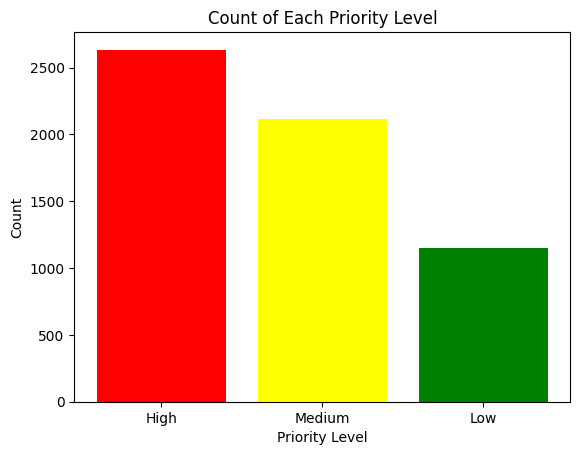

In [16]:
# Check the count of each priority level
priority_counts = data['Priority'].value_counts()

# Order the priorities
ordered_priorities = ['High', 'Medium', 'Low']

# Plotting the bar graph
plt.bar(ordered_priorities, [priority_counts.get(priority, 0) for priority in ordered_priorities], color=['red', 'yellow', 'green'])
plt.xlabel('Priority Level')
plt.ylabel('Count')
plt.title('Count of Each Priority Level')
plt.show()

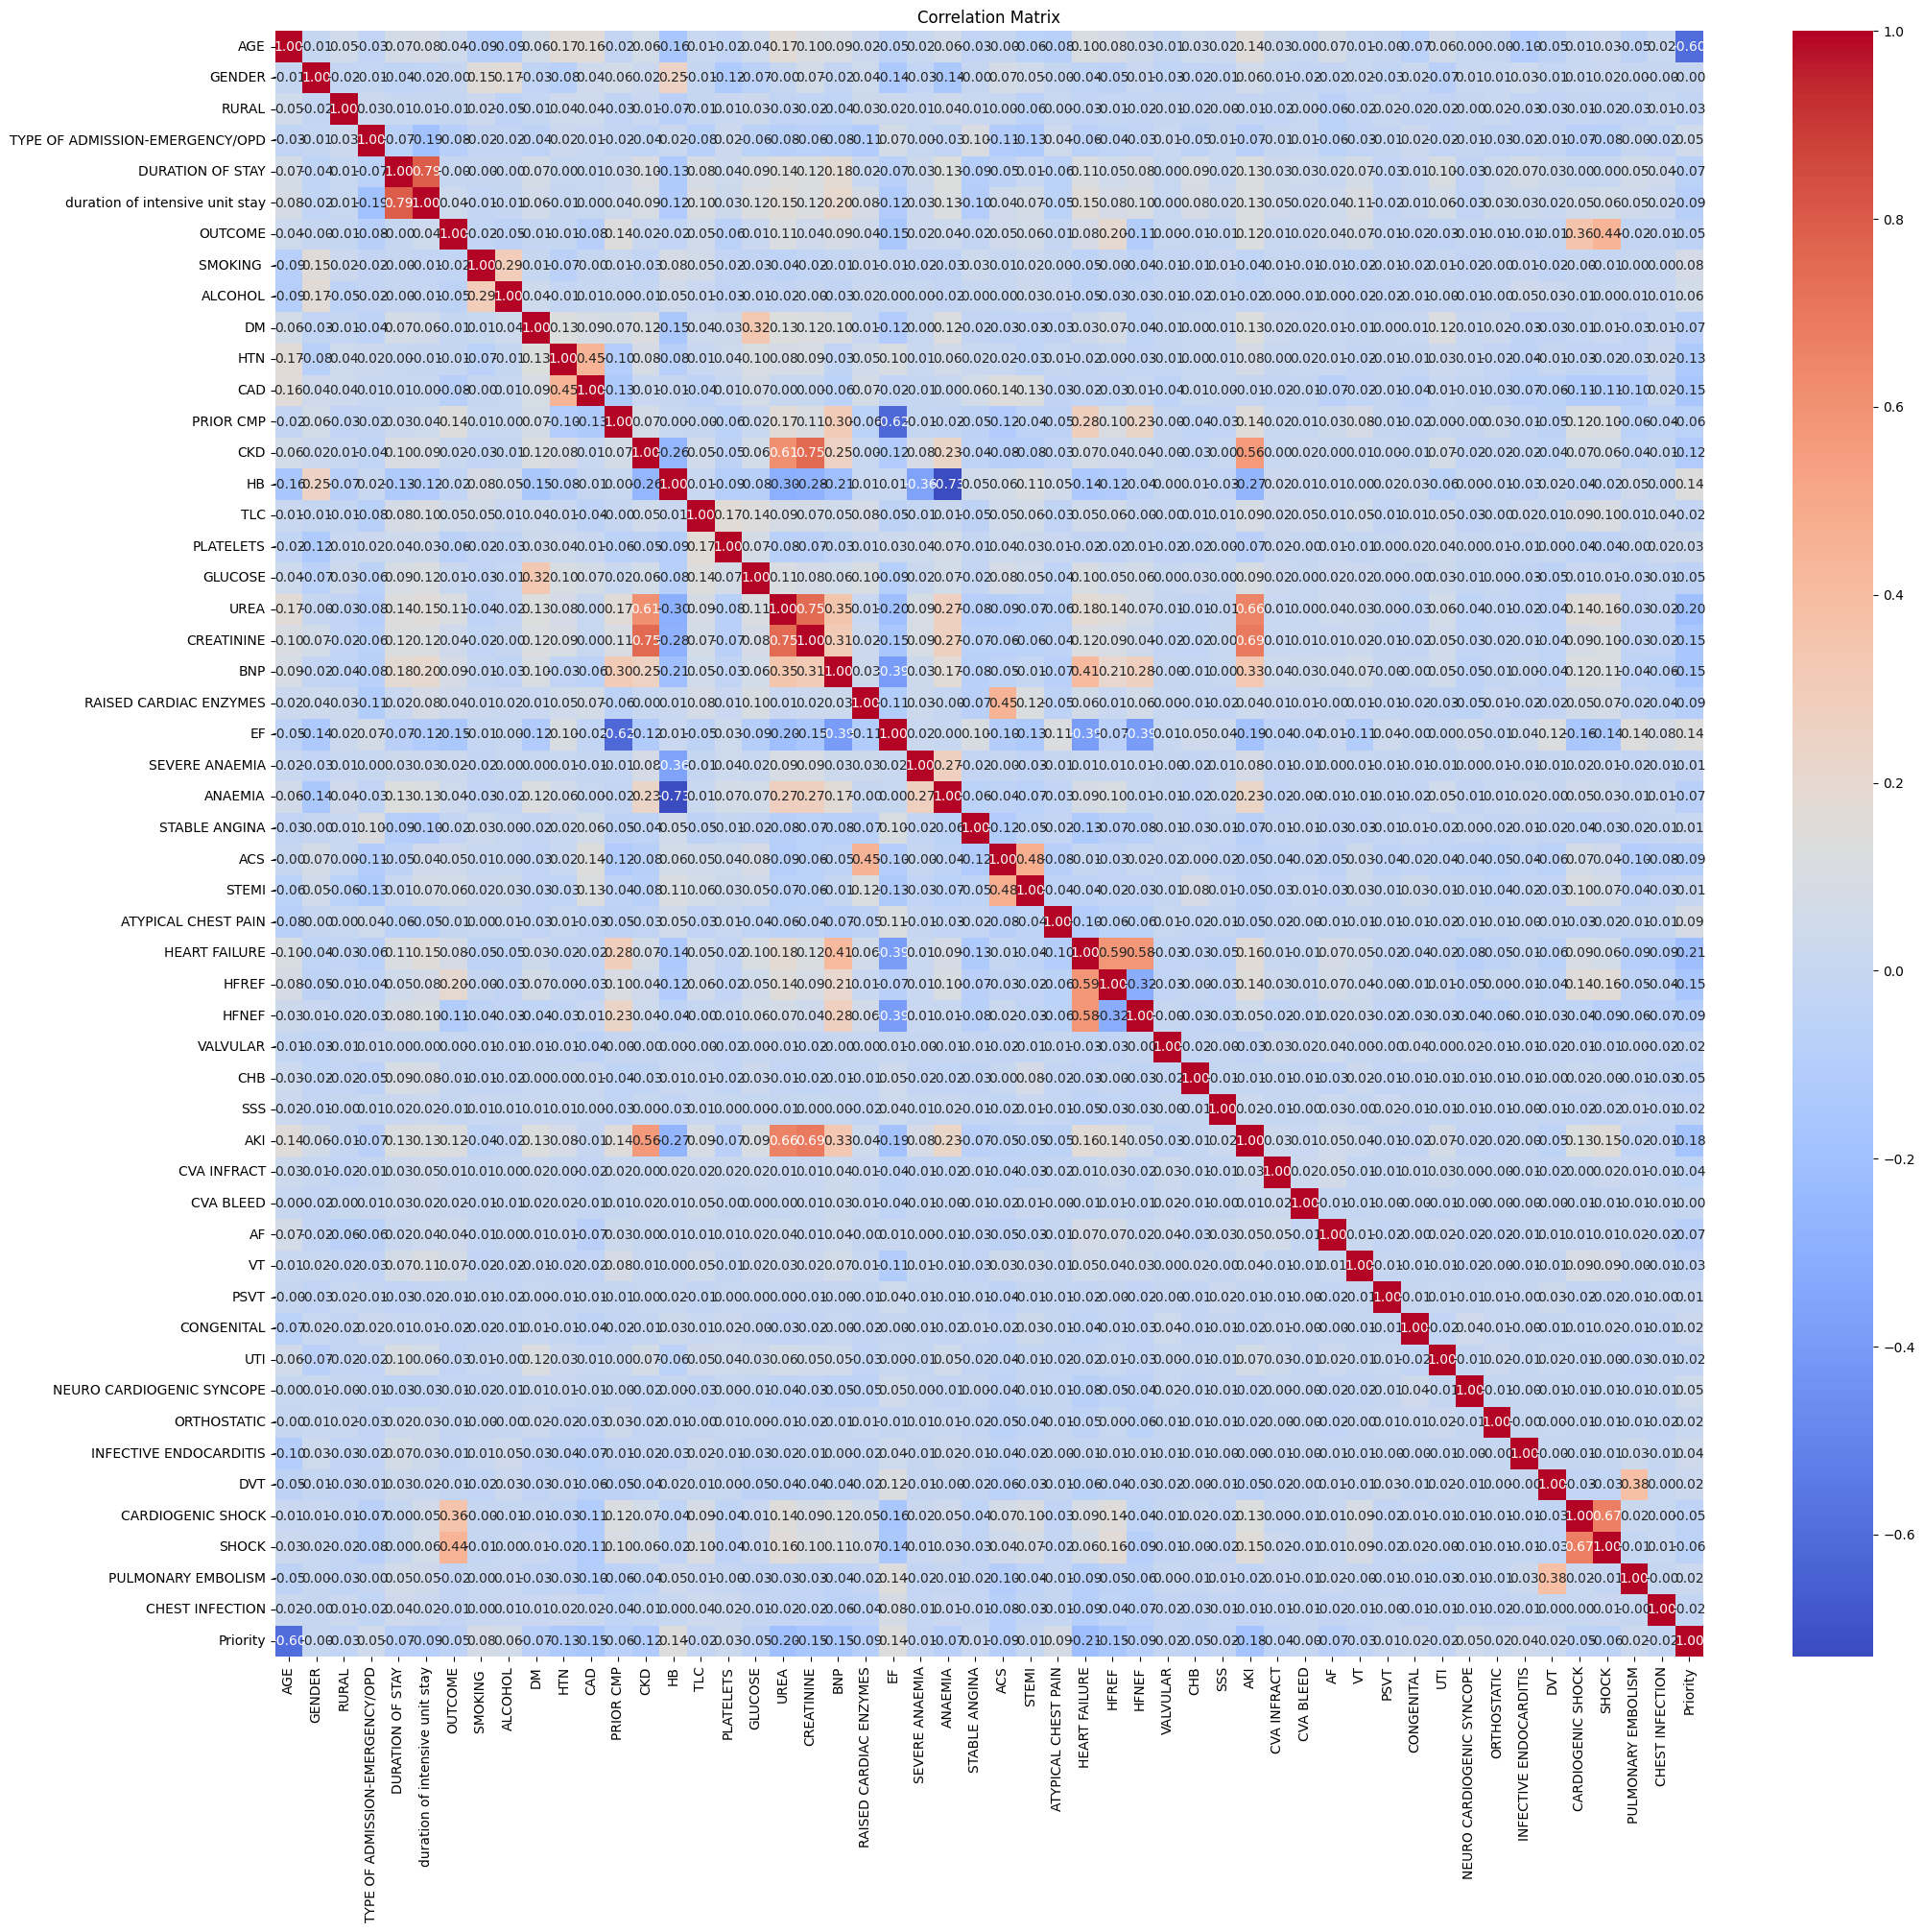

In [20]:
# Plotting the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Encoding the 'Priority' column
data['Priority'] = le.fit_transform(data['Priority'])

In [23]:
# Columns to drop
columns_to_drop = ['GENDER', 'RURAL', 'DURATION OF STAY', 'duration of intensive unit stay', 'OUTCOME', 'SMOKING', 'ALCOHOL']

# Dropping irrelevant columns
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

data.head()

,AGE,TYPE OF ADMISSION-EMERGENCY/OPD,SMOKING,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,Priority
0,81,0,0,1,0,0,0,0,9.5,16.1,...,0,0,0,0,0,0,0,0,0,0
4,60,0,0,0,1,0,1,0,13.6,9.1,...,0,0,0,0,0,0,0,0,0,2
5,44,0,0,1,1,1,1,0,13.5,22.3,...,0,0,0,0,0,0,0,0,0,2
6,56,0,0,1,1,1,1,0,13.3,12.6,...,0,0,0,0,0,0,0,0,0,2
10,52,0,0,1,1,1,0,0,13.2,7.9,...,0,0,0,0,0,1,1,0,0,2


In [24]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = data.drop(columns=['Priority'])
y = data['Priority']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4717, 45)
X_test shape: (1180, 45)
y_train shape: (4717,)
y_test shape: (1180,)


Now we can work on building a machine learning model.